In [20]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import zscore
from scipy.stats import levene
from sklearn.cluster import DBSCAN

In [4]:
df_hbn = pd.read_csv('../data/HBN.csv')
df_hbn.head()

,Unnamed: 0,id,Enrol_Season,Age,Sex,CGAS-Season,CGAS-Score,Physical-Season,Physical-BMI,Physical-Height,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_hypo_smm = df_hbn[['BIA-BIA_SMM','Sex']]
df_hypo_smm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   BIA-BIA_SMM  1991 non-null   float64
 1   Sex          3960 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 62.0 KB


In [23]:
df_smm_male = df_hypo_smm[df_hypo_smm['Sex']==0]
df_smm_female = df_hypo_smm[df_hypo_smm['Sex']==1]
print(df_smm_male.describe())
print(df_smm_female.describe())



       BIA-BIA_SMM     Sex
count  1258.000000  2484.0
mean     33.407844     0.0
std      19.579849     0.0
min       4.655730     0.0
25%      21.239225     0.0
50%      27.489950     0.0
75%      39.740575     0.0
max     254.611000     0.0
       BIA-BIA_SMM     Sex
count   733.000000  1476.0
mean     36.074160     1.0
std     136.171174     0.0
min      12.726700     1.0
25%      21.032200     1.0
50%      27.304100     1.0
75%      36.280400     1.0
max    3607.690000     1.0


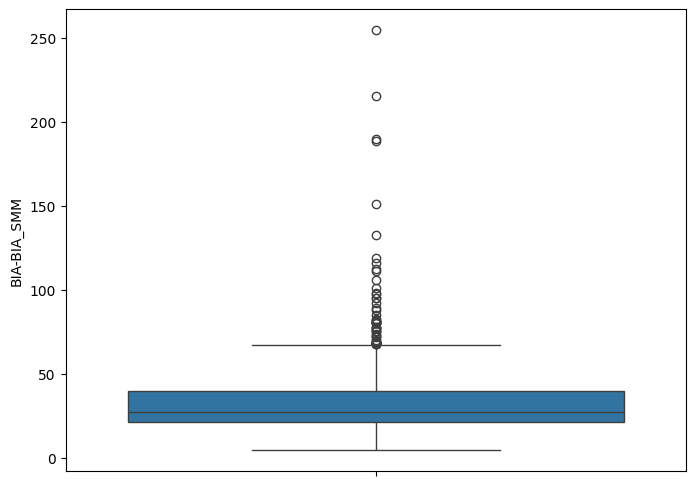

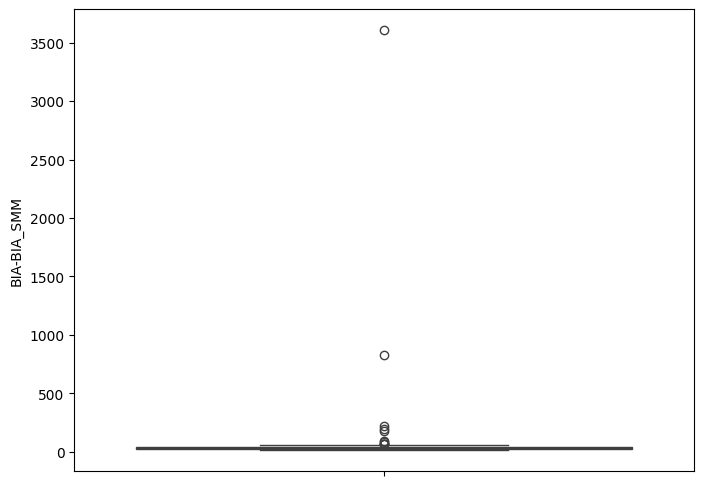

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_smm_male['BIA-BIA_SMM'])
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_smm_female['BIA-BIA_SMM'])
plt.show()

In [25]:
df_smm_female = df_smm_female.dropna(axis=0)
df_smm_male = df_smm_male.dropna(axis=0)

In [29]:
dbscan = DBSCAN(eps=10, min_samples=2)
df_smm_female['Cluster'] = dbscan.fit_predict(df_smm_female[['BIA-BIA_SMM', 'Sex']])  # استفاده از ستون‌های ویژگی‌ها

# 2. نمایش خوشه‌ها و outlierها
outliers = df_smm_female[df_smm_female['Cluster'] == -1]  # خوشه -1 نشان‌دهنده outlierهاست
clustered_data = df_smm_female[df_smm_female['Cluster'] != -1]

print("داده‌های خوشه‌بندی شده:")
print(clustered_data)

print("\nOutlierها:")
print(outliers)


داده‌های خوشه‌بندی شده:
      BIA-BIA_SMM  Sex  Cluster
5         35.3804    1        0
7         28.7680    1        0
45        46.5891    1        0
51        38.5561    1        0
52        41.0700    1        0
...           ...  ...      ...
3924      27.3057    1        0
3925      20.3503    1        0
3936      33.9367    1        0
3949      40.4123    1        0
3954      18.0937    1        0

[728 rows x 3 columns]

Outlierها:
      BIA-BIA_SMM  Sex  Cluster
2299      223.449    1       -1
3205     3607.690    1       -1
3511      823.028    1       -1
3630      178.002    1       -1
3729      193.219    1       -1


In [30]:
dbscan = DBSCAN(eps=10, min_samples=2)
df_smm_male['Cluster'] = dbscan.fit_predict(df_smm_male[['BIA-BIA_SMM', 'Sex']])  # استفاده از ستون‌های ویژگی‌ها

# 2. نمایش خوشه‌ها و outlierها
outliers = df_smm_male[df_smm_male['Cluster'] == -1]  # خوشه -1 نشان‌دهنده outlierهاست
clustered_data = df_smm_male[df_smm_male['Cluster'] != -1]

print("داده‌های خوشه‌بندی شده:")
print(clustered_data)

print("\nOutlierها:")
print(outliers)


داده‌های خوشه‌بندی شده:
      BIA-BIA_SMM  Sex  Cluster
0         19.5413    0        0
1         15.4107    0        0
3         26.4798    0        0
6         26.1957    0        0
12        36.2232    0        0
...           ...  ...      ...
3952      54.2027    0        0
3953      20.2645    0        0
3955      29.7790    0        0
3957      28.7792    0        0
3958      45.4340    0        0

[1254 rows x 3 columns]

Outlierها:
      BIA-BIA_SMM  Sex  Cluster
2490      254.611    0       -1
2738      151.025    0       -1
3091      132.636    0       -1
3774      215.413    0       -1


In [31]:
df_smm_female = df_smm_female.drop([3205,3511])

In [32]:
stat1, p1 = shapiro(df_smm_male['BIA-BIA_SMM'])
stat2, p2 = shapiro(df_smm_female['BIA-BIA_SMM'])

print(f"P-value for group with disorder: {p1}")
print(f"P-value for group without disorder: {p2}")

P-value for group with disorder: 3.3456320245338384e-41
P-value for group without disorder: 1.7730921943667725e-36


In [33]:
stat, p = mannwhitneyu(df_smm_male['BIA-BIA_SMM'], df_smm_female['BIA-BIA_SMM'])
print(f"P-value: {p}")

P-value: 0.019777825265443454


توضیح اینکه با توجه به پی ولیو تفاوت مشهودی وجود دارد 

In [35]:
df_hypo_smm_age = df_hbn[['BIA-BIA_SMM','Age']]
df_hypo_smm_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   BIA-BIA_SMM  1991 non-null   float64
 1   Age          3960 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 62.0 KB


In [37]:
df_smm_child = df_hypo_smm_age[df_hypo_smm_age['Age'] <= 13]
df_smm_teen = df_hypo_smm_age[df_hypo_smm_age['Age'] >= 14]
print(df_smm_child.describe())
print(df_smm_teen.describe())

       BIA-BIA_SMM          Age
count  1597.000000  3155.000000
mean     30.143963     8.996197
std      92.801893     2.216697
min       4.655730     5.000000
25%      20.258600     7.000000
50%      24.897600     9.000000
75%      31.577200    11.000000
max    3607.690000    13.000000
       BIA-BIA_SMM         Age
count   394.000000  805.000000
mean     51.597760   16.067081
std      20.666287    1.939501
min      21.268700   14.000000
25%      39.482125   15.000000
50%      47.798500   16.000000
75%      58.418875   17.000000
max     254.611000   22.000000


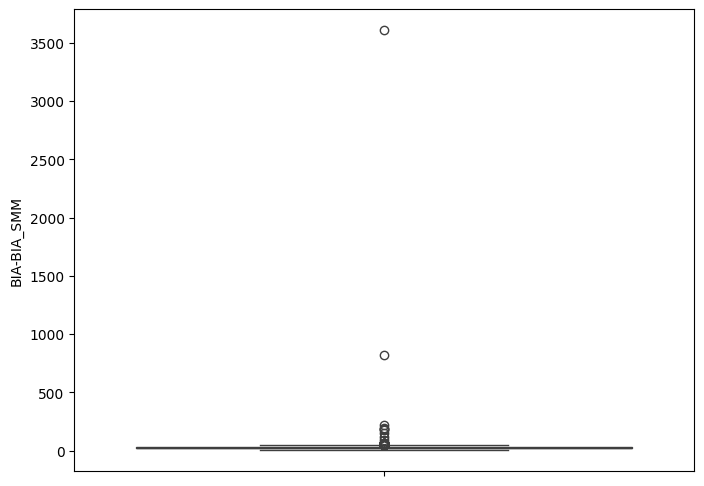

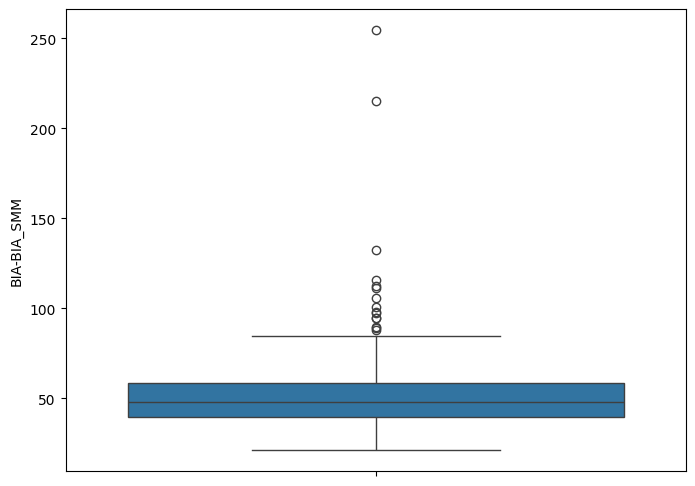

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_smm_child['BIA-BIA_SMM'])
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_smm_teen['BIA-BIA_SMM'])
plt.show()

In [39]:
df_smm_child = df_smm_child.drop([3205,3511])

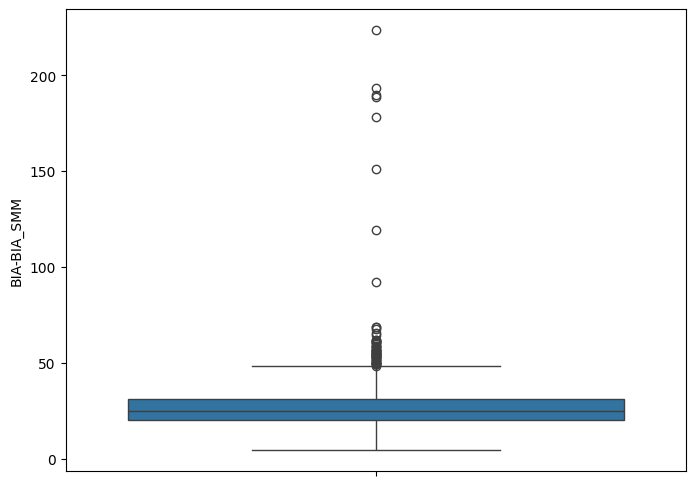

In [40]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_smm_child['BIA-BIA_SMM'])
plt.show()

In [42]:
df_smm_child = df_smm_child.dropna(axis=0)
df_smm_teen = df_smm_teen.dropna(axis=0)

In [43]:
stat1, p1 = shapiro(df_smm_child['BIA-BIA_SMM'])
stat2, p2 = shapiro(df_smm_teen['BIA-BIA_SMM'])

print(f"P-value for group with disorder: {p1}")
print(f"P-value for group without disorder: {p2}")

P-value for group with disorder: 1.2126175558793571e-51
P-value for group without disorder: 2.3382115641270135e-25


In [44]:
stat, p = mannwhitneyu(df_smm_child['BIA-BIA_SMM'], df_smm_teen['BIA-BIA_SMM'])
print(f"P-value: {p}")

P-value: 5.076072754233372e-152


تفاوت مشهوده